In [1]:
import os
import sys

# Specify the path to the directory you want to set as the new working directory
work_dir = "/home/nlp/achimoa/workspace/hebrew_text_retrieval"
source_dir = os.path.join(work_dir, "src")

# Change the current working directory
os.chdir(work_dir)

# Verify the current working directory
print("Current Working Directory: ", os.getcwd())

if source_dir not in sys.path:
    sys.path.append(source_dir)
    print("Added the source directory to the system path.")

Current Working Directory:  /home/nlp/achimoa/workspace/hebrew_text_retrieval
Added the source directory to the system path.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
import re
from tokenizer.eval_tokenizer import eval_compression
from tqdm.notebook import tqdm

# Record compression

In [ ]:
def convert_to_number(value):
    """Convert 'XM' or 'XK' to actual numbers."""
    multiplier = {'M': 1_000_000, 'K': 1_000}
    return int(value[:-1]) * multiplier[value[-1]]


eval_file = "data/mafat/hebrew/tokenizer_validation_1M.txt"
tokenizer_path = "outputs/tokenizer/*.model"
output_file = "outputs/tokenizer/evaluations/tokenizer_eval.csv"
df = pd.read_csv(output_file) if os.path.exists(output_file) else pd.DataFrame(columns=["Train Size", "Vocab Size", "Compression Rate", "model_file"])
for model_file in tqdm(glob(tokenizer_path), desc="Evaluating tokenizers"):
    if df[df['model_file'] == model_file].shape[0] > 0:
        print(f"Skipping {model_file}")
        continue
    print(model_file)
    matches = re.findall(r'\d+[MK]', model_file)
    numbers = [convert_to_number(match) for match in matches]
    train_size, vocab_size = numbers

    results = eval_compression(model_file, eval_file)
    
    data = {
        "Train Size": train_size,
        "Vocab Size": vocab_size,
        "Compression Rate": results["compression_rate"],
        "model_file": model_file
    }
    print(data)
    df.loc[len(df)] = data

    # Save the results
    df.to_csv(output_file, index=False)
    print(f"Saved results for {model_file} in outputs/tokenizer_eval.csv")


Evaluating tokenizers:   0%|          | 0/16 [00:00<?, ?it/s]

Skipping outputs/tokenizer/HebrewModernBERT_heb_10K_32K.model
Skipping outputs/tokenizer/HebrewModernBERT_heb_100K_32K.model
Skipping outputs/tokenizer/HebrewModernBERT_heb_100K_64K.model
Skipping outputs/tokenizer/HebrewModernBERT_heb_10K_64K.model
Skipping outputs/tokenizer/HebrewModernBERT_heb_10K_96K.model
Skipping outputs/tokenizer/HebrewModernBERT_heb_10K_128K.model
Skipping outputs/tokenizer/HebrewModernBERT_heb_100K_128K.model
Skipping outputs/tokenizer/HebrewModernBERT_heb_1M_32K.model
Skipping outputs/tokenizer/HebrewModernBERT_heb_10M_32K.model
Skipping outputs/tokenizer/HebrewModernBERT_heb_1M_64K.model
Skipping outputs/tokenizer/HebrewModernBERT_heb_10M_96K.model
Skipping outputs/tokenizer/HebrewModernBERT_heb_1M_128K.model
Skipping outputs/tokenizer/HebrewModernBERT_heb_10M_64K.model
outputs/tokenizer/HebrewModernBERT_heb_10M_128K.model
Loaded tokenizer from outputs/tokenizer/HebrewModernBERT_heb_10M_128K.model


Counting characters:   0%|          | 0/11373660 [00:00<?, ?it/s]

Tokenizing:   0%|          | 0/11373660 [00:00<?, ?it/s]

In [5]:
with open("data/mafat/hebrew/tokenizer_corpus_1M.txt", "r") as f:
    data = f.readlines()

len(data)

85069661

# Visualize

In [24]:
df = pd.read_csv("outputs/tokenizer/evaluations/tokenizer_eval.csv")
df = df[df["Train Size"].isin([1_000_000])]
df.head()

,Train Size,Vocab Size,Compression Rate,model_file
7,1000000,32000,3.827194,outputs/tokenizer/HebrewModernBERT_heb_1M_32K....
9,1000000,64000,4.136201,outputs/tokenizer/HebrewModernBERT_heb_1M_64K....
11,1000000,128000,4.375034,outputs/tokenizer/HebrewModernBERT_heb_1M_128K...
15,1000000,96000,4.285273,outputs/tokenizer/HebrewModernBERT_heb_1M_96K....


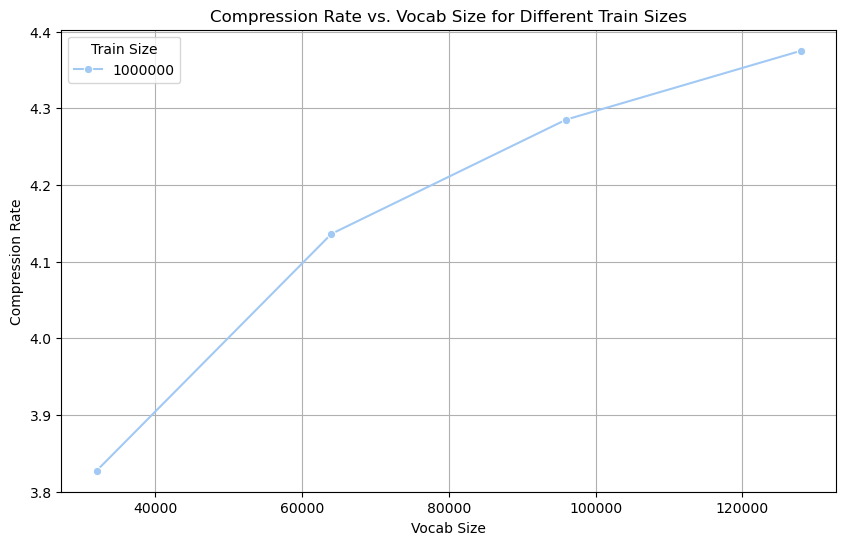

In [25]:
# Set up the figure
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="Vocab Size",
    y="Compression Rate",
    hue="Train Size",  # Different lines for different train sizes
    marker="o",
    palette="pastel"
)

# Formatting
plt.title("Compression Rate vs. Vocab Size for Different Train Sizes")
plt.xlabel("Vocab Size")
plt.ylabel("Compression Rate")
plt.legend(title="Train Size")
plt.grid(True)

# Show the chart
plt.show()

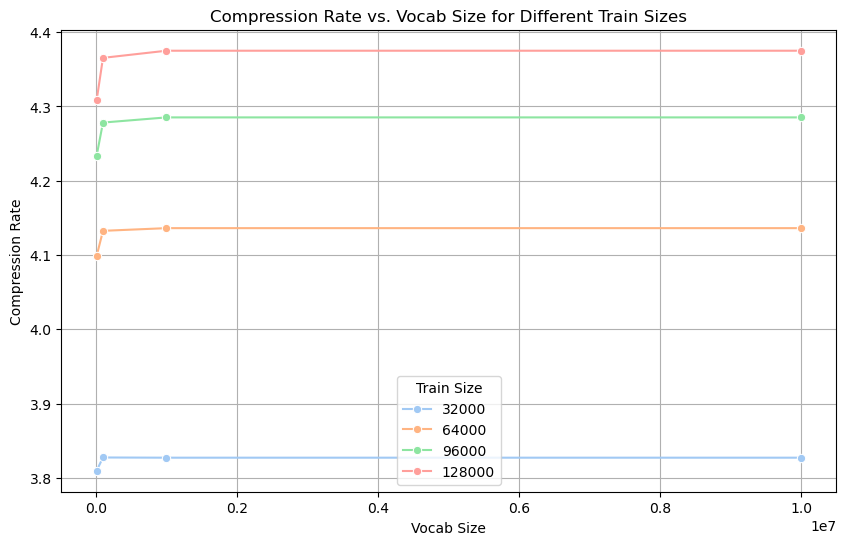

In [19]:
# Set up the figure
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    hue="Vocab Size",
    y="Compression Rate",
    x="Train Size",  # Different lines for different train sizes
    marker="o",
    palette="pastel"
)

# Formatting
plt.title("Compression Rate vs. Vocab Size for Different Train Sizes")
plt.xlabel("Vocab Size")
plt.ylabel("Compression Rate")
plt.legend(title="Train Size")
plt.grid(True)

# Show the chart
plt.show()